# Úvod do Networkx
- knihovna pro reprezentaci a analýzu grafů a sítí

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib

## Inicializace grafu
---

In [15]:
G = nx.Graph()

## Vkládání do grafu
---

In [16]:
G.add_node(1)    # po jednom
G.add_nodes_from([2, 3, 4, 5])  # ze seznamu

#G.add_nodes_from(range(2, 6))


In [17]:
G.add_edge(1, 2)   # po jedne
G.add_edges_from([(1, 3), (3, 4), (2, 3), (2, 5), (1, 3), (3, 1)])  # ze seznamu dvojic


## Info o grafu
---

In [18]:
print("# vrcholu: ", G.number_of_nodes(), "# hran:", G.number_of_edges())

# vrcholu:  5 # hran: 5


### Sousedi

In [25]:
for i in G.neighbors(2):   # sousedi vrcholu 2
    print(i)

1
3
5


### Existence hrany

In [20]:
G.has_edge(1, 2)  # existuje hrana mezi 1 a 2?

True

## Generování náhodných grafů
---

In [21]:
Ge = nx.erdos_renyi_graph(30, 0.15)
Gw = nx.watts_strogatz_graph(30, 3, 0.1)
Gb = nx.barabasi_albert_graph(30, 5)

## Čtení grafu ze souboru
---

In [22]:
#G1 = nx.read_edgelist("path.to.file")

In [23]:
#G2 = nx.read_gml("path.to.file")

### Dimacs format

In [24]:
Gd = nx.Graph()


def readdimacs(filename):

    file = open(filename, 'r')
    lines = file.readlines()

    Gd = nx.Graph()

    for line in lines:
        if line[0] == "e":
            vs = [int(s) for s in line.split() if s.isdigit()]
            Gd.add_edge(vs[0]-1, vs[1]-1)
    return Gd

Gd = readdimacs('dsjc125.9.col.txt')


FileNotFoundError: [Errno 2] No such file or directory: 'dsjc125.9.col.txt'

In [ ]:
print("# vrcholu: ", Gd.number_of_nodes(), "# hran:", Gd.number_of_edges())

## Kreslení grafů
---

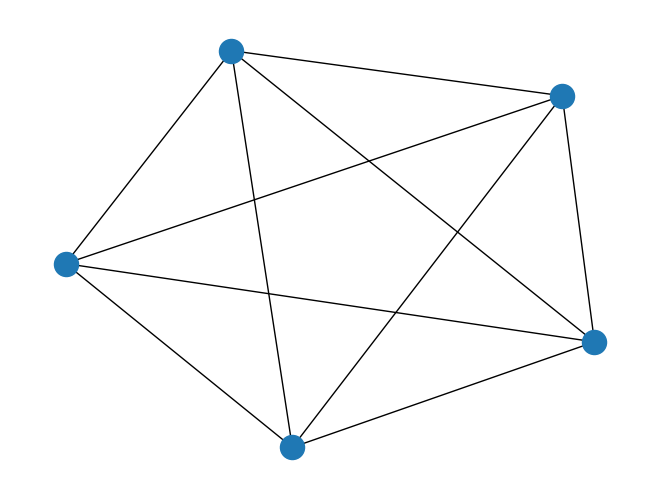

In [10]:
G = nx.complete_graph(5)
#nx.draw(G)

# problém ve starší verzi NetworkX s kódem níže, Anaconda má starou verzi
# conda uninstall networkx
# pip install networkx

# nebo použít nx.draw_networkx(G)

nx.draw(G)
#nx.draw(G, pos=nx.circular_layout(G))


### Barvičky a popisky

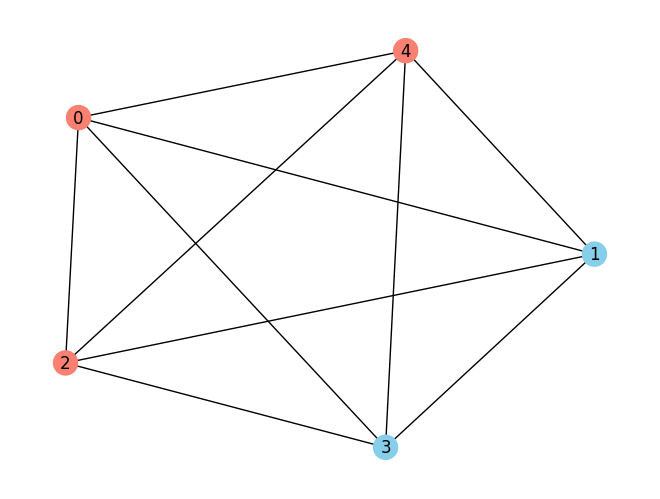

In [11]:
colornums = [0, 1, 0, 1, 0]
colmap = ['salmon', 'skyblue']  # jak prevest cisla barev na barvy

colors = [colmap[c] for c in colornums]


nx.draw(G, node_color=colors, with_labels=True)


## Cool kreslení
---

In [12]:
import numpy as np

rng = np.random.default_rng(12345)  # seed


# bere na vstupu pole barev vrcholu poporade, cislum priradi nahodne barvy a vykresli graf
def plot(G, cols):
    k = np.max(cols)
    symbols = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F']
    colmap = ["#"+''.join(rng.choice(symbols, 6)) for i in range(k+1)]

    colors = [colmap[c] for c in cols]

    nx.draw(G, node_color=colors, with_labels=True)

## Zásobárna grafů na barvení
---

- http://cedric.cnam.fr/~porumbed/graphs/

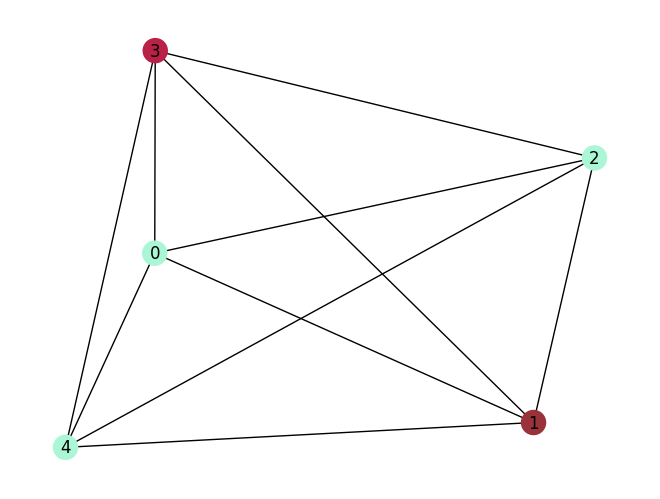

In [13]:
G = nx.complete_graph(5)
cols = [1, 2, 1, 4, 1]
plot(G, cols)